<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson2/blob/main/ML1_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=7877320488b66130ea1a5921c7332d0c661a66d1c20c3d714335b8463b079bb0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import wget

In [4]:
wget.download('https://people.sc.fsu.edu/~jburkardt/datasets/boston_housing/boston_housing.txt', "boston.txt")

'boston.txt'

In [7]:
df=pd.read_table('boston.txt',sep='\s+', engine='python', names = ['id', 'crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])

In [8]:
df.head(5)

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('medv',axis=1), 
                                                    df['medv'], 
                                                    test_size=0.3, 
                                                    random_state=777)

In [11]:
print(X_train.shape)
print(X_test.shape)

(354, 14)
(152, 14)


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
my_super_second_model = LinearRegression()

In [14]:
%%time
my_super_second_model.fit(X_train, y_train)

CPU times: user 8.15 ms, sys: 1.12 ms, total: 9.28 ms
Wall time: 55.9 ms


LinearRegression()

In [15]:
pred = my_super_second_model.predict(X_test)

### Оценка на глаз

In [16]:
test_pred = X_test.copy()

In [17]:
test_pred['predict'] = pred
test_pred['real_medv'] = y_test

In [18]:
test_pred[['predict','real_medv']].head()

,predict,real_medv
207,17.698413,22.5
425,10.395561,8.3
408,13.935512,17.2
63,21.897148,25.0
290,33.518189,28.5


In [23]:
test_pred.reset_index(inplace=True)

In [40]:
test_pred.drop(['index'],axis=1, inplace=True)

In [41]:
test_pred

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,predict,real_medv,delta
0,208,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,17.698413,22.5,-4.801587
1,426,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39,10.395561,8.3,2.095561
2,409,7.40389,0.0,18.10,0,0.597,5.617,97.9,1.4547,24,666.0,20.2,314.64,26.40,13.935512,17.2,-3.264488
3,64,0.12650,25.0,5.13,0,0.453,6.762,43.4,7.9809,8,284.0,19.7,395.58,9.50,21.897148,25.0,-3.102852
4,291,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,33.518189,28.5,5.018189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,111,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384.0,20.9,393.49,13.00,20.729996,21.7,-0.970004
148,99,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,35.204239,43.8,-8.595761
149,330,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,24.538185,22.6,1.938185
150,329,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430.0,16.9,382.44,9.97,21.570680,19.3,2.270680


In [43]:
test_pred

,id,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,predict,real_medv,delta
0,208,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,17.698413,22.5,-4.801587
1,426,15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666.0,20.2,7.68,24.39,10.395561,8.3,2.095561
2,409,7.40389,0.0,18.10,0,0.597,5.617,97.9,1.4547,24,666.0,20.2,314.64,26.40,13.935512,17.2,-3.264488
3,64,0.12650,25.0,5.13,0,0.453,6.762,43.4,7.9809,8,284.0,19.7,395.58,9.50,21.897148,25.0,-3.102852
4,291,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,33.518189,28.5,5.018189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,111,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384.0,20.9,393.49,13.00,20.729996,21.7,-0.970004
148,99,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,35.204239,43.8,-8.595761
149,330,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430.0,16.9,375.21,7.34,24.538185,22.6,1.938185
150,329,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430.0,16.9,382.44,9.97,21.570680,19.3,2.270680


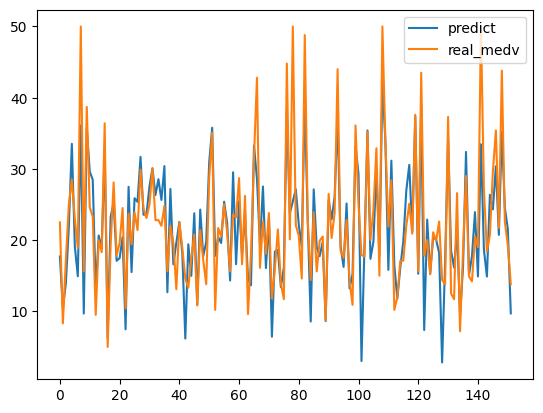

In [46]:
test_pred.plot(y=['predict', 'real_medv']);

In [47]:
test_pred['delta']=test_pred['predict']-test_pred['real_medv']

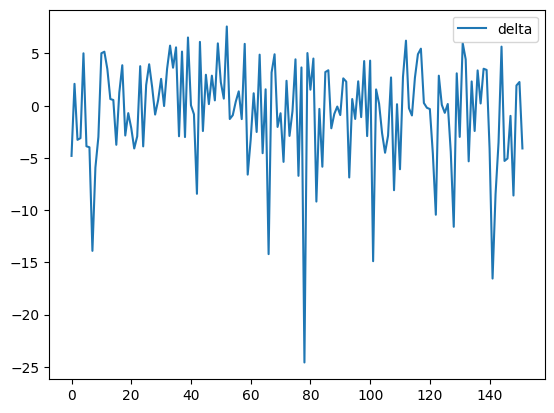

In [48]:
test_pred.plot(y=['delta']);

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
print('Ошибка RMSE c random seed 777 =',mean_squared_error(y_test, pred))

Ошибка RMSE c random seed 777 = 25.314920914841338


### разные random seed

In [51]:
pr = []


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('medv',axis=1), 
                                                    df['medv'], 
                                                    test_size=0.3, 
                                                    random_state=i)
    my_super_second_model = LinearRegression()
    my_super_second_model.fit(X_train, y_train)
    pred = my_super_second_model.predict(X_test)
#     print('Ошибка c random seed=',i,' RMSE =',mean_squared_error(y_test, pred))
    pr.append(mean_squared_error(y_test, pred))

pd.Series(pr).mean()

24.39656337672881